# Figures for Paper on CO2 Solubility in Polyether Polyols Measured with G-ADSA

In [4]:
import sys
sys.path.append('../src/')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import dataproc
import plot

from importlib import reload

reload(dataproc)
reload(plot)


# System parameters
# molecular weight of CO2
mw_co2 = 44.01
# conversion of m3 per mL
m3_per_mL = 1E-6
# Save plots?
save_plots = True
# file path to saved data
data_folder = '../../g-adsa_results/'
# file path to figures to be saved
fig_folder = '../../../PAPERS/polyol_co2/Figures/'
# csv data files
henry_file_list = ['gui_62-2f_15c', 'gui_62-2f_25c', 'gui_62-2f_35c', 'gui_62-2f_45c',
                 'gui_76-2f_15c', 'gui_76-2f_25c', 'gui_76-2f_35c', 'gui_76-2f_45c',
                 'aioni_1500-2f_50c', 'aioni_4000-2f_50c', 
                 'mg_92-3f_40c', 'mg_92-3f_60c', 'mg_92-3f_80c', 'mg_92-3f_100c', 
                 'li_150-2f_30c', 'li_150-2f_40c', 'li_150-2f_50c', 'li_150-2f_60c',
                  'li_200-2f_30c', 'li_200-2f_40c', 'li_200-2f_50c', 'li_200-2f_60c',
                  'li_300-2f_30c', 'li_300-2f_40c', 'li_300-2f_50c', 'li_300-2f_60c',
                  'li_400-2f_30c', 'li_400-2f_40c', 'li_400-2f_50c', 'li_400-2f_60c',
                '1k2f_30c', '1k2f_60c', '1k3f_30c', '1k3f_60c', '3k2f_31c', '3k2f_60c_lop',
                'p1_800-5f_35c', 'p1_800-5f_50c', 'p2_500-4f_35c', 'p2_500-4f_50c', 'p3_1k3f_35c', 'p4_450-3f_35c',
                 'p5_255-3f_35c', #'p6_1k2f_35c', 'p7_356-2f_35c',
#                 'danesh_400-2f_40c', 'danesh_400-2f_50c','danesh_600-2f_40c', 
#                 'danesh_600-2f_50c', 'danesh_1000-2f_50c', 
                 'dow_1000-5f_25c', 'dow_1000-5f_60c', 'dow_4000-2f_25c', # actually 26c
                 'wiesmet_1500-2f_65c', 'wiesmet_1500-2f_80c', 'wiesmet_1500-2f_100c',
                 'wiesmet_4000-2f_55c', 'wiesmet_4000-2f_60c', 'wiesmet_4000-2f_80c',
                 'wiesmet_4000-2f_100c', 'wiesmet_8000-2f_80c',
                'jou_150-2f_25c', 'jou_150-2f_50c', 'jou_150-2f_70c', 'jou_150-2f_100c',
                'jou_150-2f_120c',
                'gourg_200-2f_40c', 'gourg_200-2f_60c', 'gourg_200-2f_75c',
                'gourg_400-2f_40c', 'gourg_400-2f_60c', 'gourg_400-2f_75c',
                'gourg_600-2f_40c', 'gourg_600-2f_60c', 'gourg_600-2f_75c',]
               # 'flichy_2700-2f_25c', 'flichy_2700-2f_35c']
                 #, 'nunes_92-3f_80c', 'nunes_92-3f_120c', 'nunes_92-3f_150c', ]
# creates colormap
cmap = cm.get_cmap('jet')
# defines markers of each series
d_marker = {'gui_62-2f': 'v', 'gui_76-2f':'^', 'mg_92-3f': 's', '1k2f':'o', '1k3f':'^', '3k2f':'*', 'p1_800-5f':'h',
            'p2_500-4f':'+', 'p3_1k3f':'^', 'p4_450-3f':'p', 'p5_255-3f':'d', 'p6_1k2f':'o', 'p7_356-2f':'p', 'aioni_1500-2f': 'o',
           'aioni_4000-2f':'<', 'li_150-2f':'1', 'li_200-2f':'2', 'li_300-2f':'3', 'li_400-2f':'4', 'danesh_400-2f':'>',
           'danesh_600-2f':'<', 'danesh_1000-2f':'o', 'dow_1000-5f':'h', 'dow_4000-2f':'<', 'wiesmet_1500-2f':'o',
           'wiesmet_4000-2f':'<', 'wiesmet_8000-2f':'*', 'jou_150-2f': 's', 'gourg_200-2f':'s', 'gourg_400-2f':'>',
           'gourg_600-2f':'<', 'flichy_2700-2f':'*'}

d_fill = {'p6_1k2f':'bottom', 'aioni_1500-2f':'full', 'aioni_1500-2f':'full', 'p1_800-5f':'full', 
          'p7_356-2f':'full', 'danesh_400-2f':'full', 'danesh_600-2f':'full', 'danesh_1000-2f':'top', 
          'dow_1000-5f':'full', 'wiesmet_1500-2f':'top', 'wiesmet_4000-2f':'top', 'gourg_200-2f':'bottom',
         'gourg_400-2f':'bottom', 'gourg_600-2f':'bottom', 'flichy_2700-2f':'full', 'p3_1k3f':'full'}

# csv data files
g_adsa_file_list = ['1k2f_30c', '1k3f_30c', '1k2f_60c', '1k3f_30c', '1k3f_60c', '3k2f_31c', '3k2f_60c_lop', '3k2f_60c_hip']
# csv data file for snapshots (references for interfacial tension)
ref_if_tension_file = 'ref_drop_if_tension.csv'
# folder of csv data files for DFT predictions of interfacial tension
dft_data_folder = '../input/dft_pred/'
# folder of csv data files showing sensitivity of DFT predictions to PC-SAFT parameters
dft_sensitivity_folder = '../input/dft_pred/3k2f_31c_sensitivity/'

## Extract Data

In [5]:
d_henry = dataproc.load_proc_data(henry_file_list, data_folder)
d_g_adsa = dataproc.load_proc_data(g_adsa_file_list, data_folder)

# Plots Solubility vs. Pressure for Different Molecular Weights of PPG

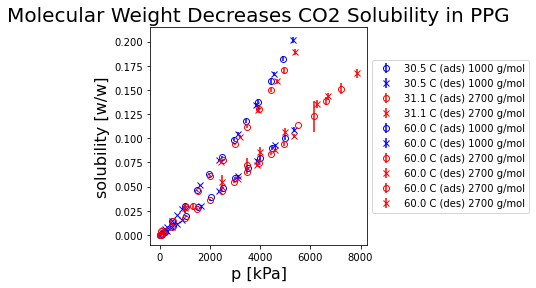

In [9]:
# title of plot
title = 'Molecular Weight Decreases CO2 Solubility in PPG'

# molecular weight (30 C)
ax = plot.plot_errorbars_ads_des(d_g_adsa['1k2f_30c']['p'], d_g_adsa['1k2f_30c']['solub'], d_g_adsa['1k2f_30c']['s_solub'], 
                                d_g_adsa['1k2f_30c']['p'], d_g_adsa['1k2f_30c']['T'], color='b', xlabel='p [kPa]',
                                ylabel='solubility [w/w]', title=title,
                                label_tag='1000 g/mol')
ax = plot.plot_errorbars_ads_des(d_g_adsa['3k2f_31c']['p'], d_g_adsa['3k2f_31c']['solub'], d_g_adsa['3k2f_31c']['s_solub'], 
                                d_g_adsa['3k2f_31c']['p'], d_g_adsa['3k2f_31c']['T'], color='r', ax=ax,
                                 label_tag='2700 g/mol')    
# molecular weight (60 C)
ax = plot.plot_errorbars_ads_des(d_g_adsa['1k2f_60c']['p'], d_g_adsa['1k2f_60c']['solub'], d_g_adsa['1k2f_60c']['s_solub'],
                                 d_g_adsa['1k2f_60c']['p'], d_g_adsa['1k2f_60c']['T'], color='b', ax=ax,
                                label_tag='1000 g/mol')
ax = plot.plot_errorbars_ads_des(d_g_adsa['3k2f_60c_lop']['p'], d_g_adsa['3k2f_60c_lop']['solub'],
                                 d_g_adsa['3k2f_60c_lop']['s_solub'],
                                 d_g_adsa['3k2f_60c_lop']['p'], d_g_adsa['3k2f_60c_lop']['T'], color='r', ax=ax,
                                 label_tag='2700 g/mol')
ax = plot.plot_errorbars_ads_des(d_g_adsa['3k2f_60c_hip']['p'], d_g_adsa['3k2f_60c_hip']['solub'], 
                                 d_g_adsa['3k2f_60c_hip']['s_solub'],
                                 d_g_adsa['3k2f_60c_hip']['p'], d_g_adsa['3k2f_60c_hip']['T'], color='r', ax=ax,
                                 label_tag='2700 g/mol')

# TODO: adjust with PC-SAFT to temperatures of 30.5 C and 60 C from 26 C
# # plot solubility vs. p of Dow's P4000 measurements from 20190220_co2_solubility_v360_4000.csv by Dr. Jacob Crosthwaite
# ax = plot.plot_errorbars_ads_des(d_henry['dow_4000-2f_25c']['p'], d_henry['dow_4000-2f_25c']['solub'], 
#                                  d_henry['dow_4000-2f_25c']['s_solub'], d_henry['dow_4000-2f_25c']['p'], 
#                                  d_henry['dow_4000-2f_25c']['T'], color='k', ax=ax, label_tag='4000 g/mol')

# put legend outside of plot box
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.65, box.height])
legend_x = 1
legend_y = 0.5
plt.legend(loc='center left', bbox_to_anchor=(legend_x, legend_y))

# save figure
if save_plots:
    plt.savefig(fig_folder + 'fig2_mw_decreases_co2.pdf', bbox_inches='tight')

## Figure 3: Hydroxyl Functionality Decreases CO2 Solubility in Polyether Polyols

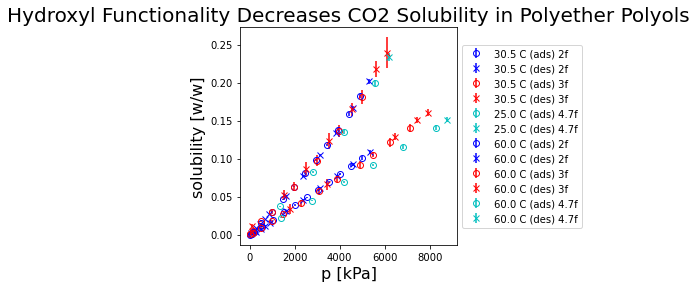

In [10]:
title = 'Hydroxyl Functionality Decreases CO2 Solubility in Polyether Polyols'

# functionality (30 C)
# VORANOL 2110B 1k2f (2 functionality)
ax = plot.plot_errorbars_ads_des(d_g_adsa['1k2f_30c']['p'], d_g_adsa['1k2f_30c']['solub'], d_g_adsa['1k2f_30c']['s_solub'], 
                                d_g_adsa['1k2f_30c']['p'], d_g_adsa['1k2f_30c']['T'], color='b', xlabel='p [kPa]',
                                ylabel='solubility [w/w]', title=title,
                                label_tag='2f')
# VORATEC SD 301 1k3f (3 functionality)
ax = plot.plot_errorbars_ads_des(d_g_adsa['1k3f_30c']['p'], d_g_adsa['1k3f_30c']['solub'], d_g_adsa['1k3f_30c']['s_solub'], 
                                d_g_adsa['1k3f_30c']['p'], d_g_adsa['1k3f_30c']['T'], color='r', ax=ax,
                                 label_tag='3f')
# VORANOL 360, 1000-5f (4.7 functionality)
ax = plot.plot_errorbars_ads_des(d_henry['dow_1000-5f_25c']['p'], d_henry['dow_1000-5f_25c']['solub'], 
                                 d_henry['dow_1000-5f_25c']['s_solub'],
                                 d_henry['dow_1000-5f_25c']['p'], d_henry['dow_1000-5f_25c']['T'], color='c', ax=ax,
                                 label_tag='4.7f')
        
# # then plots predictions from DFT
# # loads dft predictions into a similarly structured dictionary
# dft_data_folder = 'dft_pred/1000-5f_25c/'
# d_dft = dataproc.load_dft(dft_data_folder)
# tag = '1000-5f_25c'
# color = 'c'
# ax.plot(d_dft[tag]['p'], d_dft[tag]['solub'], color=color, label=tag + ' (30.5 C, PC-SAFT)')
    
plt.legend()
    

###################################### 60 C ######################################
    
ax = plot.plot_errorbars_ads_des(d_g_adsa['1k2f_60c']['p'], d_g_adsa['1k2f_60c']['solub'], d_g_adsa['1k2f_60c']['s_solub'], 
                                 d_g_adsa['1k2f_60c']['p'], d_g_adsa['1k2f_60c']['T'], color='b', ax=ax, label_tag='2f')
ax = plot.plot_errorbars_ads_des(d_g_adsa['1k3f_60c']['p'], d_g_adsa['1k3f_60c']['solub'], d_g_adsa['1k3f_60c']['s_solub'], 
                                 d_g_adsa['1k3f_60c']['p'], d_g_adsa['1k3f_60c']['T'], color='r', ax=ax, label_tag='3f')
ax = plot.plot_errorbars_ads_des(d_henry['dow_1000-5f_60c']['p'], d_henry['dow_1000-5f_60c']['solub'],
                                 d_henry['dow_1000-5f_60c']['s_solub'], d_henry['dow_1000-5f_60c']['p'],
                                 d_henry['dow_1000-5f_60c']['T'], color='c', ax=ax, label_tag='4.7f')
# put legend outside of plot box
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*0.65, box.height])
legend_x = 1
legend_y = 0.5
plt.legend(loc='center left', bbox_to_anchor=(legend_x, legend_y))

# save figure
if save_plots:
    plt.savefig(fig_folder + 'fig3_fn_decreases_co2.pdf', bbox_inches='tight')

## Figure 4: Henry's Constant is Non-monotonic in Molecular Weight for Difunctional Polyether Polyols

../src\dataproc.py:309: RuntimeWarning: invalid value encountered in less_equal
  inds_H = np.logical_and(p <= p_thresh, np.logical_and(np.logical_not(np.isnan(c)),
C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


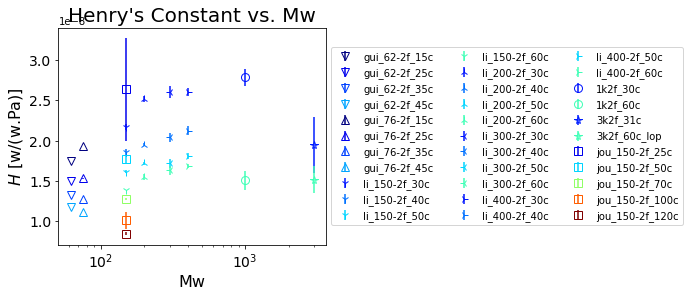

In [14]:
# prunes dictionary of data for Henry's constant to remove poor datasets
remove_list = ['gourg', 'danesh', '3f', '4f', '5f', 'p7', 'p6', 'mg', 'aioni', 'dow', 'wiesmet']

def tags_not_in_string(tag_list, string):
    for tag in tag_list:
        if tag in string:
            return False
    return True

henry_file_list_pruned = [file for file in henry_file_list if tags_not_in_string(remove_list, file)]            
# computes and plots Henry's constant vs. functionality / molecular weight
ax = plot.henrys_const(d_henry, henry_file_list_pruned, cmap, d_marker, d_fill=d_fill,
                                   save_path=fig_folder + 'fig4_henry_nonmonotonic_2f.pdf',
                                  by_wt=True, x_label='Mw')